
# BrainDead competition of Revelation'23
## Problem Statement 1 : Analysis of Placement Data
### Performed by Chodapaneedi Venkata Siva Ram


## Importing required modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Reading Data

In [2]:
df=pd.read_csv(r"C:\Users\choda\Downloads\Placement_Data_Full_Class.csv")

## Performing EDA

## Glance of Data

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Checking for Null Values

In [4]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### we will drop sl_no, salary variables which are not relevant for our analysis

## Unique values in categorical variables

In [5]:
non_numeric_cols = df.select_dtypes(exclude=['int', 'float']).columns
for col in non_numeric_cols:
    print(col + ':', df[col].unique())

gender: ['M' 'F']
ssc_b: ['Others' 'Central']
hsc_b: ['Others' 'Central']
hsc_s: ['Commerce' 'Science' 'Arts']
degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


## Count plots for categorical variables

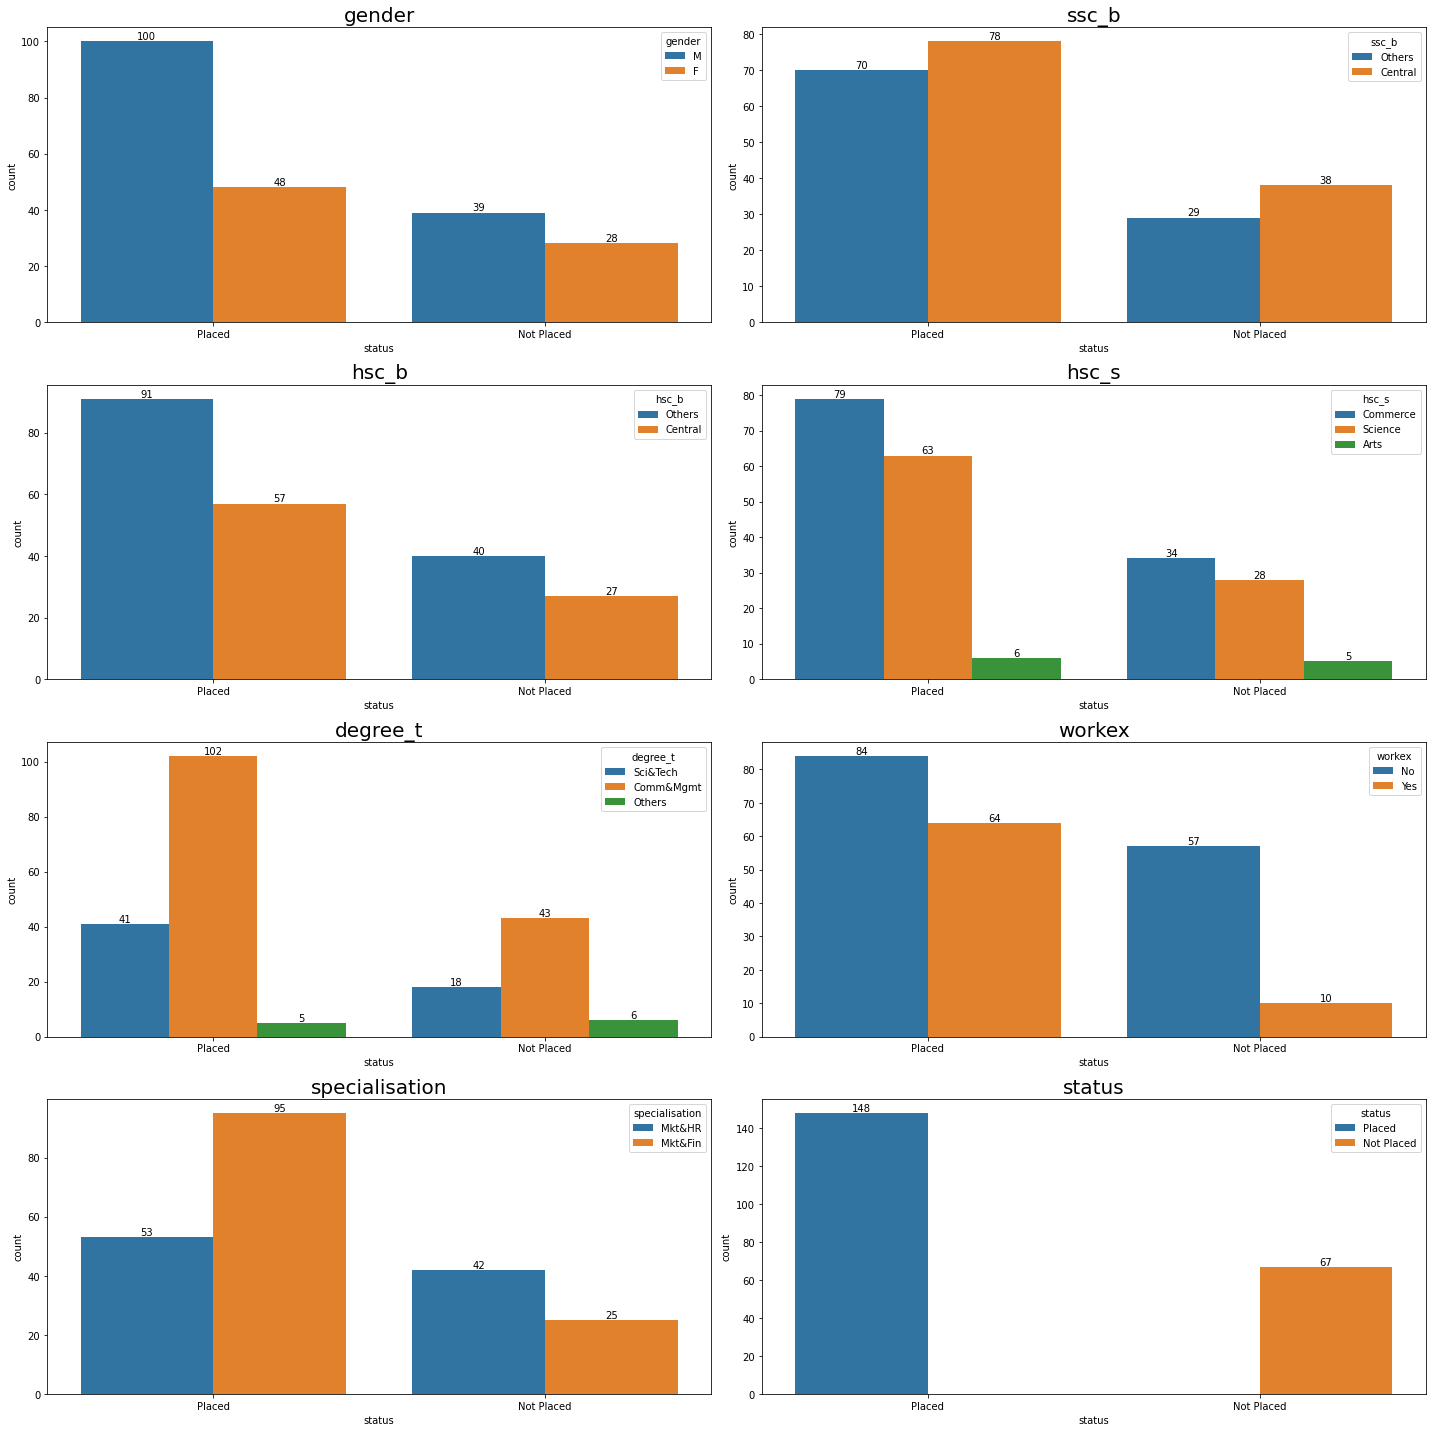

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

axes = axes.flatten()

for i, col in enumerate(non_numeric_cols):
    sns.countplot(data=df, x='status', hue=col, ax=axes[i])
    
    for label in axes[i].containers:
        axes[i].bar_label(label)

    axes[i].set_title(col,fontsize=20)
    
plt.tight_layout()
plt.show()


## Cross Tables for numerical variables

In [7]:
tables = []
cols = []

for col in non_numeric_cols:
    table = pd.crosstab(df['status'], df[col], normalize='all')*100
    tables.append(table)
    cols.append(col)

result = pd.concat(tables, axis=1, keys=cols)

result.style.format(precision=2)

In [8]:
tables = []
cols = []

for col in non_numeric_cols:
    table = pd.crosstab(df['status'], df[col], normalize='columns')*100
    tables.append(table)
    cols.append(col)

result = pd.concat(tables, axis=1, keys=cols)

result.style.format(precision=2)

## Min, Max, Mean, Median statistics for numerical variables.

In [9]:
table = df[["ssc_p","hsc_p","degree_p","etest_p","mba_p"]].groupby(df['status']).mean()
table

,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836
Placed,71.721486,69.926554,68.740541,73.238041,62.579392


In [10]:
table = df.groupby(['specialisation', 'status'])[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].min()
table

ssc_p  hsc_p  degree_p  etest_p  mba_p
specialisation status                                            
Mkt&Fin        Not Placed  41.00  39.00      50.2    50.00  51.21
               Placed      49.00  50.83      56.0    50.48  52.81
Mkt&HR         Not Placed  40.89  37.00      50.0    54.48  54.96
               Placed      55.68  53.00      56.0    50.00  52.38

In [11]:
table = df.groupby(['specialisation', 'status'])[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].max()
table

ssc_p  hsc_p  degree_p  etest_p  mba_p
specialisation status                                            
Mkt&Fin        Not Placed   70.5  82.00      79.0    97.00  75.71
               Placed       87.0  97.70      85.0    98.00  77.89
Mkt&HR         Not Placed   77.8  74.66      77.5    92.66  72.14
               Placed       89.4  91.00      91.0    97.00  76.26

In [12]:
table = df.groupby(['specialisation', 'status'])[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean()
table

ssc_p      hsc_p   degree_p    etest_p  \
specialisation status                                                   
Mkt&Fin        Not Placed  56.526400  60.009200  62.493200  69.157600   
               Placed      72.234105  70.949895  69.191579  76.392842   
Mkt&HR         Not Placed  58.149762  57.435000  60.325238  69.844048   
               Placed      70.802642  68.092264  67.932075  67.583208   

                               mba_p  
specialisation status                 
Mkt&Fin        Not Placed  60.844000  
               Placed      63.347158  
Mkt&HR         Not Placed  62.070476  
               Placed      61.203208

In [13]:
table = df.groupby(['specialisation', 'status'])[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].median()
table

ssc_p  hsc_p  degree_p  etest_p   mba_p
specialisation status                                             
Mkt&Fin        Not Placed  55.00   62.5     61.00     64.0  61.580
               Placed      73.24   70.0     68.00     75.2  63.080
Mkt&HR         Not Placed  58.50   59.0     59.95     67.5  60.665
               Placed      69.00   66.6     68.00     65.0  60.410

## Histogram plots for checking spread of the data

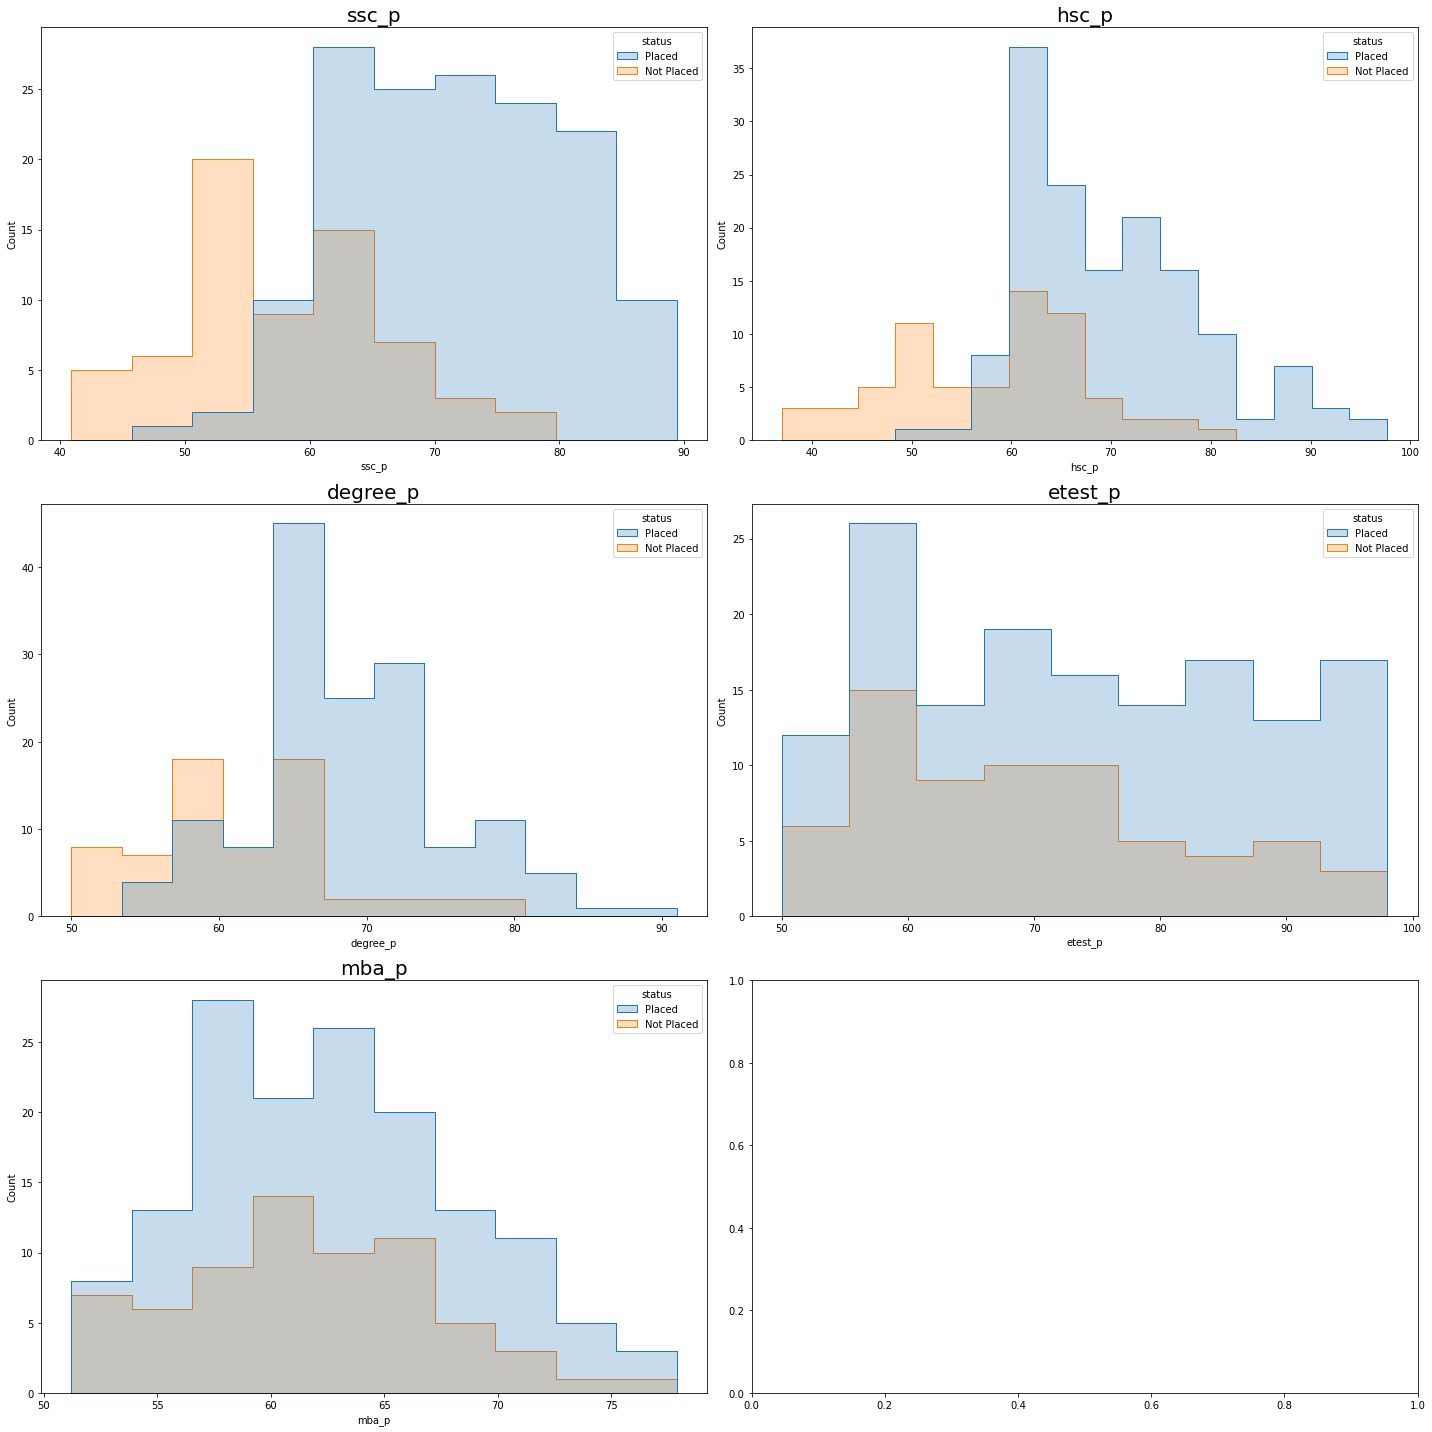

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

axes = axes.flatten()

for i, col in enumerate(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']):
    sns.histplot(data=df, x=col, hue="status", ax=axes[i],element="step")
    
    for label in axes[i].containers:
        axes[i].bar_label(label)

    axes[i].set_title(col,fontsize=20)
    
plt.tight_layout()
plt.show()


## Encoding Categorical Data

In [15]:
encoder = LabelEncoder()

encoded_df = df.copy()

for i in non_numeric_cols:
    encoded_df[i] = encoder.fit_transform(encoded_df[i])


In [16]:
encoded_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


## Correlation plot

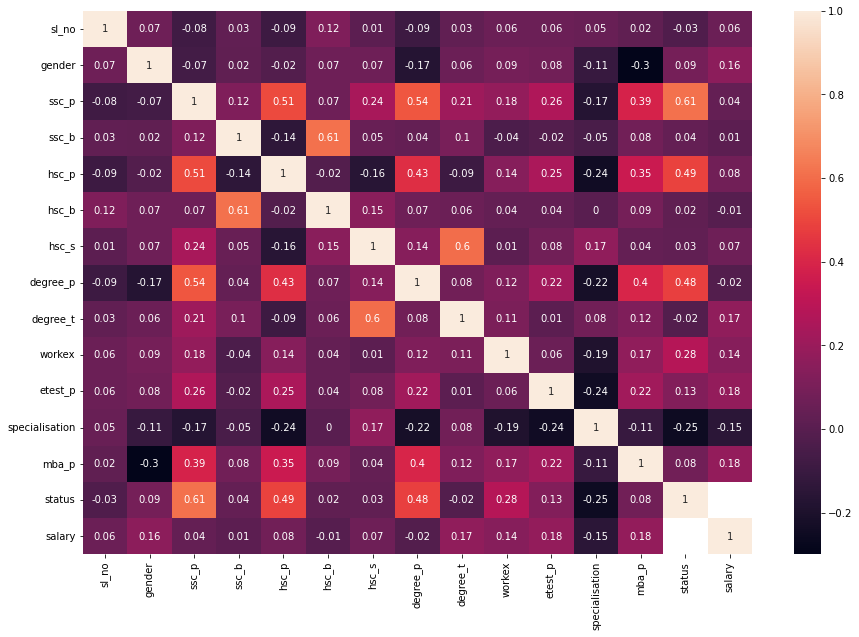

In [17]:
matrix = encoded_df.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True)
plt.show()

# <span style='background:yellow'>Inference from EDA:</span> 

## 1. What are the factors affecting the placement of a student?
### It seems that percentages obtained for SSC, HSC and Degree are most affecting factors

## 2. Which degree specializations are in high demand in the industry?
### Marketing and Finance

## 3. Does mba percentage matter in placement?
### After analyzing the cross tables, it appears that the MBA percentage is not as influential in determining placement as other important factors. This is supported by the fact that there is no significant difference in the minimum, maximum, mean, and median MBA percentage between placed and unplaced students.
#

## Utilizing models to further support the inferences from EDA.

<span style='color:Blue'> Random forest classification and logistic regression models are selected as data contains multiple categorical variables. </span>

### Training data

In [18]:
x=encoded_df.drop(["status", "salary", "sl_no"],axis=1)
y=encoded_df["status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=42)

### Random forest classification

In [19]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3, random_state=42)
model.fit(x_train,y_train)

prediction_test =accuracy_score(model.predict(x_test), y_test)
prediction_train =accuracy_score(model.predict(x_train), y_train)

print("test accuracy:",prediction_test,"\ntrain accuracy:", prediction_train)

test accuracy: 0.8333333333333334 
train accuracy: 0.9622641509433962


In [20]:
importance_df = pd.DataFrame({'feature': x.columns.tolist(), 'importance': model.feature_importances_})
sorted_importance_df = importance_df.sort_values('importance', ascending=False)
print(sorted_importance_df)

           feature  importance
6         degree_p    0.332846
1            ssc_p    0.263573
3            hsc_p    0.100513
9          etest_p    0.087056
11           mba_p    0.079533
8           workex    0.064237
5            hsc_s    0.021003
7         degree_t    0.016387
10  specialisation    0.015191
2            ssc_b    0.009121
0           gender    0.005877
4            hsc_b    0.004662


### Logistic regression

In [21]:
model_LR = LogisticRegression(max_iter=1000,random_state=42)
model_LR.fit(x_train,y_train)

prediction_test =accuracy_score(model_LR.predict(x_test), y_test)
prediction_train =accuracy_score(model_LR.predict(x_train), y_train)

print("test accuracy:",prediction_test,"\ntrain accuracy:", prediction_train)


test accuracy: 0.808641975308642 
train accuracy: 0.9433962264150944


In [22]:
coef_df = pd.DataFrame({'feature': x.columns.tolist(), 'coefficient': model_LR.coef_[0]})
sorted_coef_df = coef_df.sort_values('coefficient', ascending=False)
print(sorted_coef_df)

           feature  coefficient
8           workex     0.678571
6         degree_p     0.441465
0           gender     0.251441
2            ssc_b     0.235641
1            ssc_p     0.211118
4            hsc_b     0.059663
3            hsc_p     0.025016
9          etest_p     0.002954
5            hsc_s     0.001962
11           mba_p    -0.233163
10  specialisation    -0.303428
7         degree_t    -0.527688


# <span style='background:yellow'> Conclusion:</span> 

## 1. What are the factors affecting the placement of a student?
### Based on the analysis, it seems that the percentage obtained in SSC and Degree have the most significant impact on the employment status of the candidates. Both models have assigned higher weightage to these factors. 

#### Although Work experience and other categorical features have the highest coefficient in Logistic Regression, it is not considered the most crucial factor since they are categorical variable, and the dataset is relatively small to include these factors in regression. Further we can quantify with checking assumptions of Logistic regression such as multicolinearity, which can be inferred from the correlation analysis. ex: high correlation between ssc_b and hsc_b.

## 2. Which degree specializations are in high demand in the industry?
### Marketing and Finance

## 3. Does mba percentage matter in placement?
### After analyzing the cross tables, it appears that the MBA percentage is not as influential in determining placement as other important factors. This is supported by the fact that there is no significant difference in the minimum, maximum, mean, and median MBA percentage between placed and unplaced students. <span style='color:Blue'> Additionally, the models used for analysis suggest that the MBA percentage has little impact on job placement.</span>